In [1]:
import pandas as pd

## 1. Read some data

In [2]:
data = pd.read_csv("./Data/Wholesale customers data.csv")

In [3]:
data.head(4)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788


In [4]:
data.isnull().sum()


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
X = data.drop('Channel', axis=1)
y = data['Channel'].map({1:0,2:1})

## 2. Train test split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 3. Let's find the best conventional model

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVM': SVC(max_iter=10000),
    'DT': DecisionTreeClassifier(),
    'kNN' : KNeighborsClassifier()
}
params = { 
    'LogisticRegression': { 'C': [0.1, 1, 2], 'class_weight':['balanced',None] },
    'RandomForestClassifier': { 'n_estimators': [50,200, 300,400,500],'class_weight':['balanced',None]},
    'SVM' : {'kernel':['linear', 'poly', 'rbf', 'sigmoid']},
    'DT' : {'criterion':['gini','Entropy'],'class_weight':['balanced',None]},
    'kNN' : {'n_neighbors': [3,5,7,9,11] , 'weights' : ['uniform','balanced']}
}

In [8]:
from HyperclassifierSearch import HyperclassifierSearch
search = HyperclassifierSearch(models, params)
best_model = search.train_model(X_train, y_train, cv=5)

Search for LogisticRegression ...
Search for RandomForestClassifier ...
Search for SVM ...


C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarni

Search for DT ...


C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\DEMO_ACCOUNT\anaconda3\lib\sit

Search for kNN ...
Search is done.


C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\U

results round for: LogisticRegression
results round for: RandomForestClassifier
results round for: SVM
results round for: DT
results round for: kNN


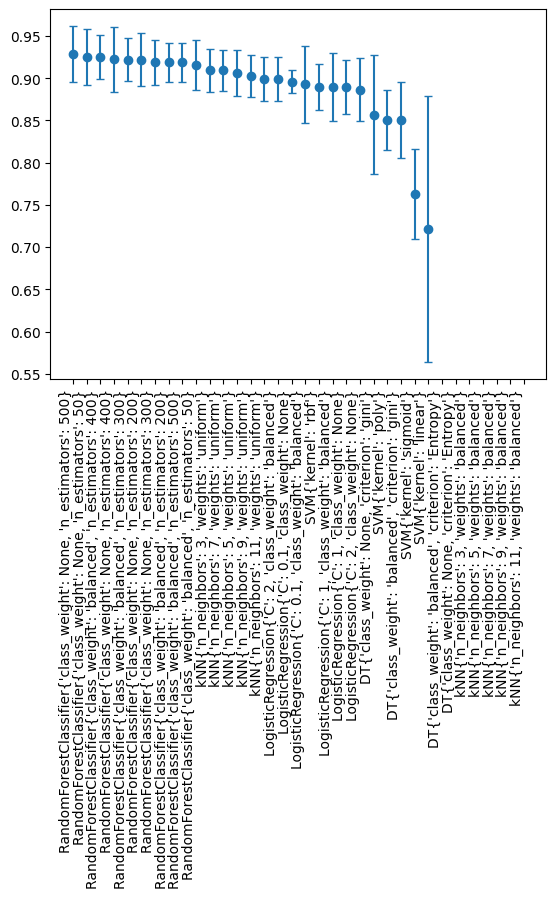

In [9]:
from matplotlib import pyplot as plt
result = search.evaluate_model()
result['label'] = result['Estimator'].astype(str) + result['params'].astype(str)
std = result['std_test_score'].to_list()
mean_ = result['mean_test_score'].to_list()
x = result['label'].to_list()
plt.errorbar(x, mean_, std, linestyle='None', marker='o',capsize=3)
plt.xticks(rotation=90, ha='right')
plt.show()

### 4. Select some of the conventional model to get test classification report

In [10]:
from sklearn.metrics import classification_report as report

In [11]:
clf = RandomForestClassifier(n_estimators=500,class_weight=None)
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.9000    0.9419    0.9205        86
           1     0.8810    0.8043    0.8409        46

    accuracy                         0.8939       132
   macro avg     0.8905    0.8731    0.8807       132
weighted avg     0.8934    0.8939    0.8927       132



## 5. Try The 3 boosting model

In [12]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
preds = xgb.predict(X_test)
print(report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.8913    0.9535    0.9213        86
           1     0.9000    0.7826    0.8372        46

    accuracy                         0.8939       132
   macro avg     0.8957    0.8680    0.8793       132
weighted avg     0.8943    0.8939    0.8920       132



In [13]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(X_train,y_train)
preds = cb.predict(X_test)
print(report(y_test,preds,digits=4))

Learning rate set to 0.006231
0:	learn: 0.6858814	total: 92.7ms	remaining: 1m 32s
1:	learn: 0.6787225	total: 98.2ms	remaining: 49s
2:	learn: 0.6696568	total: 103ms	remaining: 34.2s
3:	learn: 0.6627488	total: 111ms	remaining: 27.7s
4:	learn: 0.6556807	total: 120ms	remaining: 23.8s
5:	learn: 0.6481772	total: 127ms	remaining: 21s
6:	learn: 0.6409897	total: 134ms	remaining: 19.1s
7:	learn: 0.6345874	total: 144ms	remaining: 17.9s
8:	learn: 0.6268185	total: 153ms	remaining: 16.9s
9:	learn: 0.6212757	total: 162ms	remaining: 16s
10:	learn: 0.6142205	total: 171ms	remaining: 15.4s
11:	learn: 0.6073015	total: 177ms	remaining: 14.6s
12:	learn: 0.6009304	total: 193ms	remaining: 14.6s
13:	learn: 0.5947961	total: 204ms	remaining: 14.3s
14:	learn: 0.5877410	total: 210ms	remaining: 13.8s
15:	learn: 0.5815590	total: 217ms	remaining: 13.3s
16:	learn: 0.5753468	total: 233ms	remaining: 13.5s
17:	learn: 0.5695057	total: 240ms	remaining: 13.1s
18:	learn: 0.5637591	total: 258ms	remaining: 13.3s
19:	learn: 0.5

In [14]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train,y_train)
preds = clf.predict(X_test)
print(report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.9121    0.9651    0.9379        86
           1     0.9268    0.8261    0.8736        46

    accuracy                         0.9167       132
   macro avg     0.9195    0.8956    0.9057       132
weighted avg     0.9172    0.9167    0.9154       132



In [15]:
from sklearn.ensemble import AdaBoostClassifier
models = [LogisticRegression(C=1),RandomForestClassifier(n_estimators=200,class_weight=None)]
for model in models:
    print(type(model).__name__)
    ada = AdaBoostClassifier(n_estimators=100, random_state=0,estimator=model)
    ada.fit(X_train,y_train)
    preds = ada.predict(X_test)
    print(report(y_test,preds,digits=4))

LogisticRegression
              precision    recall  f1-score   support

           0     0.8723    0.9535    0.9111        86
           1     0.8947    0.7391    0.8095        46

    accuracy                         0.8788       132
   macro avg     0.8835    0.8463    0.8603       132
weighted avg     0.8801    0.8788    0.8757       132

RandomForestClassifier
              precision    recall  f1-score   support

           0     0.9000    0.9419    0.9205        86
           1     0.8810    0.8043    0.8409        46

    accuracy                         0.8939       132
   macro avg     0.8905    0.8731    0.8807       132
weighted avg     0.8934    0.8939    0.8927       132



## 6. what is more about these boosting?

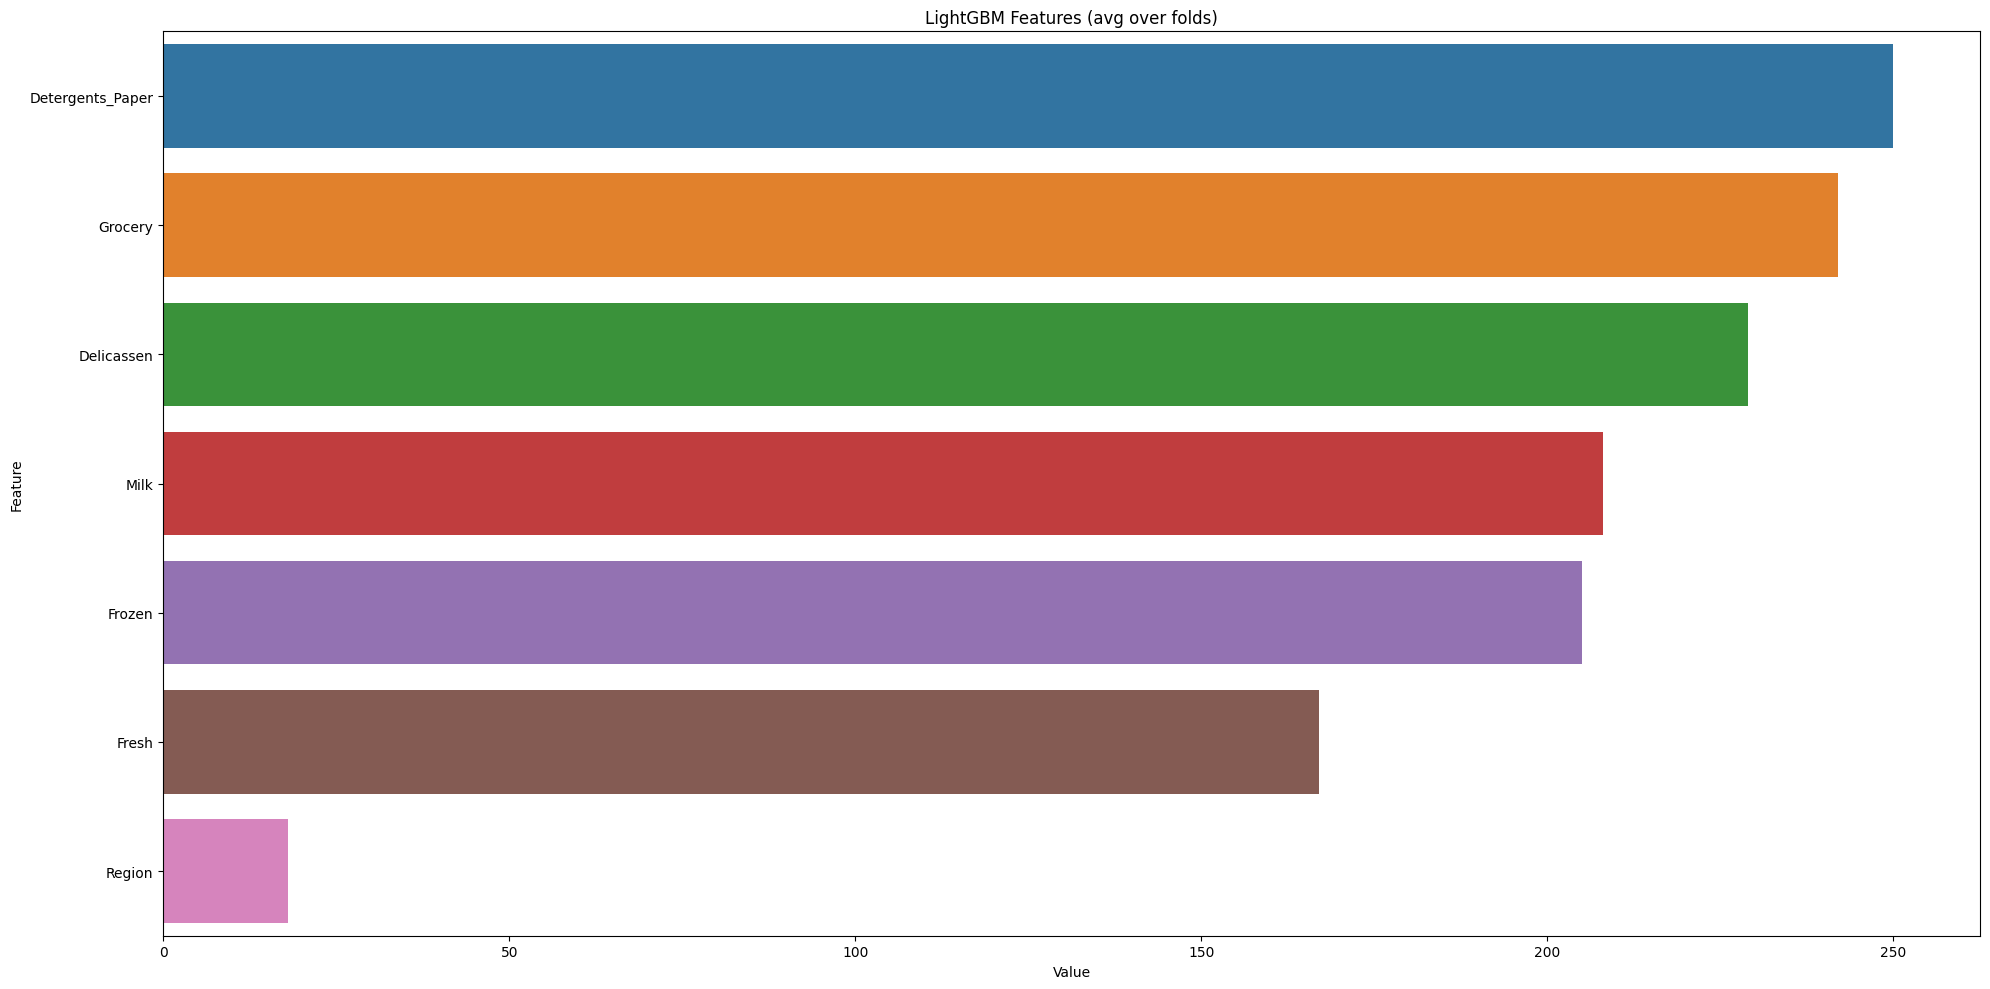

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

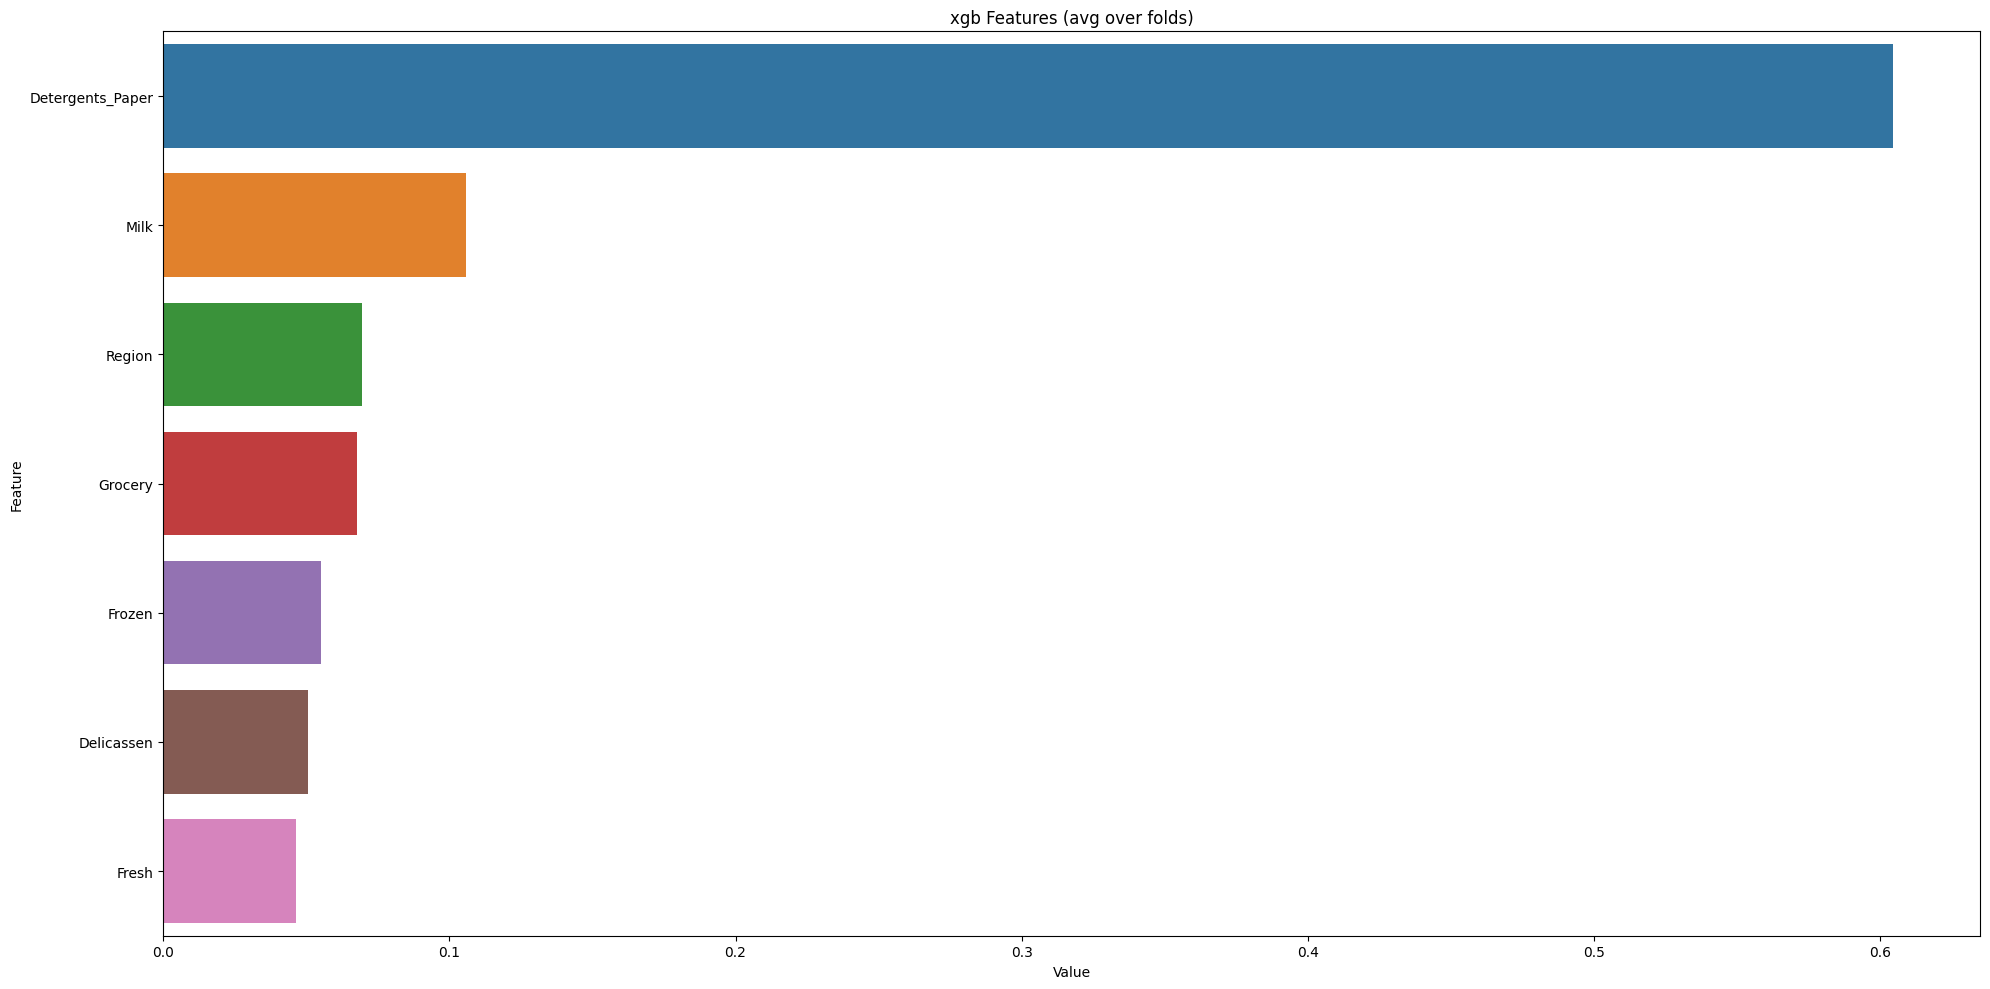

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('xgb Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('xgb_importances-01.png')

In [7]:
# from typing import Dict
# from datetime import datetime as dt
# import random

# def _function_name_(ref_map: Dict, key):
#     try:
#         ref_map[key]()
#     except KeyError:
#         print(f"Key {key} not found in the reference map.")

# # Example usage:
# def func_1():
#     print(1)

# def func_2():
#     print(2)
    
# def func_3():
#     print(3)

# def func_4():
#     print(4)
    
# def func_5():
#     print(5)

# ref_map = {
#     "1": func_1,
#     "2": func_2,
#     "3": func_3,
#     "4": func_4,
#     "5": func_5
# }

# array_ = [random.choice([1, 2, 3, 4, 5]) for _ in range(1000000)]

# start = dt.now()
# for item in array_:
#     if item == 1:
#         func_1()
#     elif item == 2:
#         func_2()
#     elif item == 3:
#         func_3()
#     elif item == 4:
#         func_4()
#     elif item == 5:
#         func_5()
    
# second = (dt.now() - start).total_seconds()

# start = dt.now()
# for item in array_:
#     _function_name_(ref_map, str(item))
    
# first_ = (dt.now() - start).total_seconds()

# print("First: ", first_)
# print("Second: ", second)